In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("scorm_tracking_copy.csv", sep=";")
data.set_index("object_id")

,id,actor,session_uuid,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
object_id,,,,,,,,,,,,
694-vorstellung,1,ga2018_umbe@yopmail.com,session-20,lesson,1.0,100.0,589.0,8,2016-08-25 17:22:56,2016-08-25 17:32:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
683-programme-nescens,2,dtic@mobiletic.com,session-33,lesson,1.0,0.0,6194.0,2,2016-08-25 17:27:34,2017-11-02 15:40:38,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
678-politique-et-cadre-legal,3,dtic@mobiletic.com,session-37,lesson,1.0,71.0,31203.0,11,2016-08-25 17:27:58,2017-10-27 08:21:30,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
671-presentation,4,dtic@mobiletic.com,session-46,lesson,1.0,22.0,112788.0,7,2016-08-25 17:29:27,2017-11-30 16:53:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
684-informatique,5,dtic@mobiletic.com,session-52,lesson,1.0,0.0,841.0,4,2016-08-25 17:30:45,2017-11-02 15:56:02,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
691-reseau-developpement,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,lesson,1.0,0.0,48.0,17,2018-12-13 11:21:20,2018-12-13 11:22:08,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
691-reseau-developpement,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,lesson,1.0,0.0,5.0,17,2018-12-13 11:22:13,2018-12-13 11:22:19,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
724-but-du-module,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,lesson,1.0,0.0,18.0,1,2018-12-13 11:23:33,2018-12-13 11:23:51,"{""objectives"":[{""id"":""1_introduction"",""progres...",1


In [4]:
actor = data.groupby("object_id").actor.nunique()

In [5]:
nbre_session = data.groupby("object_id").session_uuid.count()

In [6]:
score_max =  data.groupby("object_id").score.max()

In [7]:
score_min = data.groupby("object_id").score.min()

In [8]:
t =data.where(data.score>=50).groupby("object_id").score.mean()

In [9]:
all = pd.DataFrame({"actor": actor, "nbre_session": nbre_session, "score_max":score_max, "score_min":score_min,"tx":t})
all

In [11]:
# data.insert(2, "score_sup", 1)
data["score_sup"] = np.where(data["score"]>=50, 1,0)

In [13]:
score_sp = data.groupby(["object_id","actor"]).score_sup.max()
score_sp =score_sp.reset_index()

In [14]:
n_admi = score_sp.groupby('object_id').score_sup.sum()
n_actor = score_sp.groupby('object_id').score_sup.count()

In [15]:
taux = (n_admi/n_actor)*100

In [16]:
data.set_index("object_id")

,id,actor,session_uuid,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed,score_sup
object_id,,,,,,,,,,,,,
694-vorstellung,1,ga2018_umbe@yopmail.com,session-20,lesson,1.0,100.0,589.0,8,2016-08-25 17:22:56,2016-08-25 17:32:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,1
683-programme-nescens,2,dtic@mobiletic.com,session-33,lesson,1.0,0.0,6194.0,2,2016-08-25 17:27:34,2017-11-02 15:40:38,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,0
678-politique-et-cadre-legal,3,dtic@mobiletic.com,session-37,lesson,1.0,71.0,31203.0,11,2016-08-25 17:27:58,2017-10-27 08:21:30,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,1
671-presentation,4,dtic@mobiletic.com,session-46,lesson,1.0,22.0,112788.0,7,2016-08-25 17:29:27,2017-11-30 16:53:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1,0
684-informatique,5,dtic@mobiletic.com,session-52,lesson,1.0,0.0,841.0,4,2016-08-25 17:30:45,2017-11-02 15:56:02,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691-reseau-developpement,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,lesson,1.0,0.0,48.0,17,2018-12-13 11:21:20,2018-12-13 11:22:08,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1,0
691-reseau-developpement,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,lesson,1.0,0.0,5.0,17,2018-12-13 11:22:13,2018-12-13 11:22:19,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1,0
724-but-du-module,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,lesson,1.0,0.0,18.0,1,2018-12-13 11:23:33,2018-12-13 11:23:51,"{""objectives"":[{""id"":""1_introduction"",""progres...",1,0


In [17]:
all = pd.DataFrame({"actor": actor, "nbre_session": nbre_session, "score_max":score_max, "score_min":score_min,"taux":taux})
all.sort_values(by="taux", ascending=False)

,actor,nbre_session,score_max,score_min,taux
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
...,...,...,...,...,...
774-ktg-unfall-und-krankheit,88,133,0.0,0.0,0.000000
773-familienzulagen,87,105,0.0,0.0,0.000000
772-arbeitslosenversicherung,87,95,0.0,0.0,0.000000


In [18]:
dix_premier = all.sort_values(by="taux", ascending=False).iloc[0:10]
dix_premier

,actor,nbre_session,score_max,score_min,taux
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
765-urlaub,88,308,100.0,0.0,97.727273
766-unbezahlter-urlaub,88,188,100.0,0.0,97.727273
729-salaire,129,255,100.0,0.0,97.674419
747-modification-des-rapports-de-travail,124,242,100.0,0.0,97.580645


In [19]:
top_dernier = dix_premier.iloc[[0,9],:]
top_dernier

,actor,nbre_session,score_max,score_min,taux
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
736-conge-non-paye,122,270,100.0,0.0,96.721311


In [37]:
dernier_df = np.array(dix_premier)

# 2

In [21]:
all_modules = all.sort_values(by="taux", ascending=False)
all_modules

,actor,nbre_session,score_max,score_min,taux
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
...,...,...,...,...,...
774-ktg-unfall-und-krankheit,88,133,0.0,0.0,0.000000
773-familienzulagen,87,105,0.0,0.0,0.000000
772-arbeitslosenversicherung,87,95,0.0,0.0,0.000000


In [22]:
def moduleData(index):
    nom_module = all_modules.iloc[[index]].index[0]
    all_data_for_module = data.loc[data["object_id"]==nom_module,:].groupby("actor")
    n_session = all_data_for_module.session_uuid.count()
    n_total_temps = all_data_for_module.temps.sum()
    score = all_data_for_module.score.max()
    need_data_module = pd.DataFrame({"n_session":n_session, "temps Total" : n_total_temps, "Score":score})
    need_data_module["Resultat Final"]=np.where(need_data_module["Score"]>=50, 1,0)
    return need_data_module

In [23]:
moduleData(0)

,n_session,temps Total,Score,Resultat Final
actor,,,,
dtic@mobiletic.com,4,1546.0,83.0,1
ga2018_05n7@yopmail.com,1,425.0,67.0,1
ga2018_096a@yopmail.com,4,481.0,100.0,1
ga2018_0buu@yopmail.com,1,236.0,67.0,1
ga2018_0hot@yopmail.com,1,449.0,67.0,1
...,...,...,...,...
ga2018_xovt@yopmail.com,1,316.0,50.0,1
ga2018_xsog@yopmail.com,1,380.0,83.0,1
ga2018_yap3@yopmail.com,1,686.0,100.0,1


In [24]:
def graphique(moduleD):
    moduleD.sort_values(by="temps Total", ascending = False)
    moduleD["temps Total"] = moduleD["temps Total"]/60
    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
    ax.plot(moduleD["temps Total"], moduleD["Score"], label='Nom')
    ax.set_xlabel('Temps Total') 
    ax.set_ylabel('Score')  
    ax.set_title("Repartition du Score en fonction du Temps")

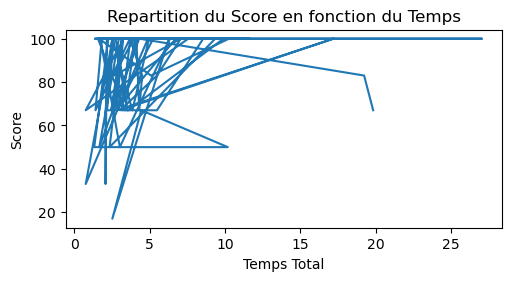

In [25]:
graphique(moduleData(8))

In [26]:
def all_Graphique_In_One(all_top_modulex):
    fig, ax = plt.subplots(figsize=(15, 5.7), layout='constrained')
    for i in range(len(all_top_modulex)):
        all_top_modulex[i].sort_values(by="temps Total", inplace=True)
        all_top_modulex[i]["temps Total"] = all_top_modulex[i]["temps Total"]/60
        ax.plot(all_top_modulex[i]["temps Total"], all_top_modulex[i]["Score"], label=i)
    ax.set_xlabel('Temps Total')
    ax.set_ylabel('Score')
    ax.set_title("Repartition du Score en fonction du Temps")
    ax.legend()

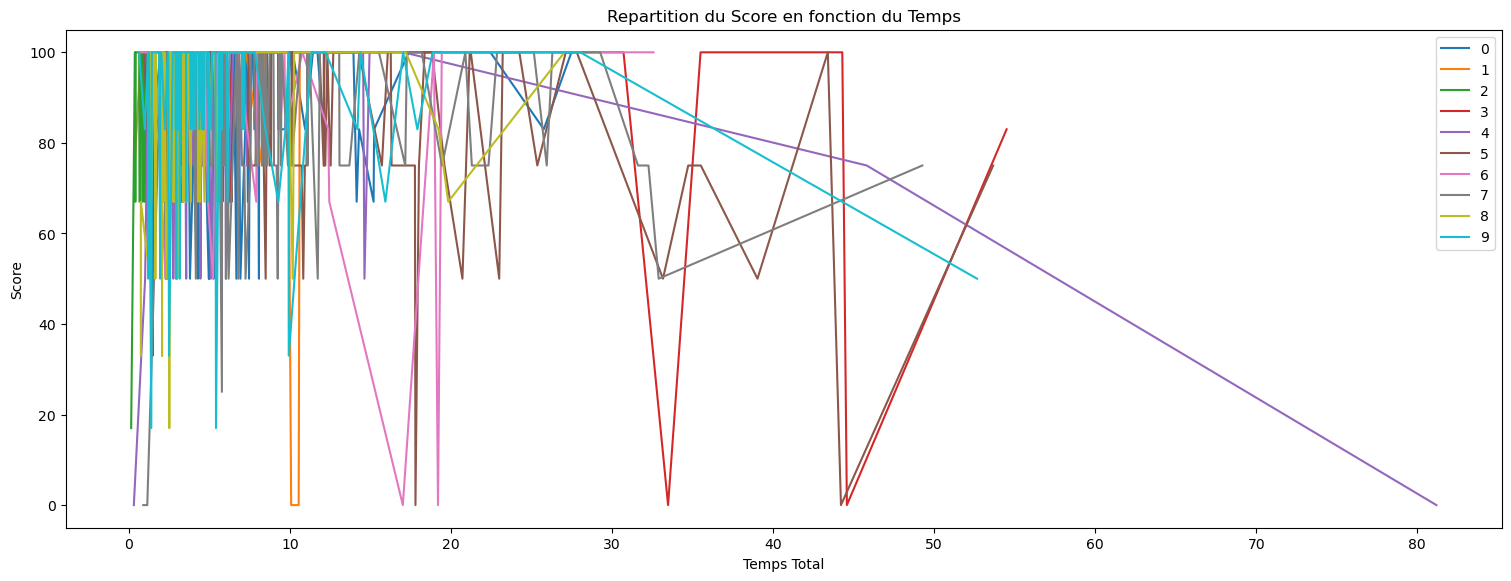

In [27]:
dix_premier
# dp = dix_premier.sort_values(by="temps Total")
donnee = [moduleData(i) for i in range(len(dix_premier))]
all_Graphique_In_One(donnee)

# Diagramme en Bar

<BarContainer object of 10 artists>

d:\installation\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


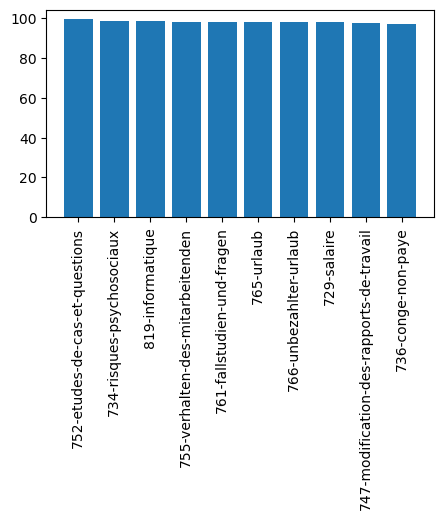

In [28]:
fig, ax = plt.subplots(figsize = (5,2.7), layout = "constrained")
plt.xticks(rotation= "vertical")
axis = [all_modules.iloc[[index]].index[0] for index in range(len(dix_premier))]
ordonnee = dix_premier["taux"]
ax.bar(axis, ordonnee)

# Pour les 3 top module:

In [29]:
def top3_module_Data_Graphique(n_module):   
    fig, ax = plt.subplots(3,1, layout='constrained', sharex=True)
    fig.subplots_adjust(hspace=0)
    for i in range(n_module):
        moduleData(i).sort_values(by="n_session", ascending=False)
        df = moduleData(i).sort_values(by="Score", ascending=False)
        df.insert(0, 'Rang', range(1, 1 + len(df)))
        ax[i].plot(df["Rang"], df["Score"], label='Nom')
        ax[i].set_xlabel('Rang') 
        ax[i].set_ylabel('Score Max')  
        ax[i].set_title("M"+str(i+1))
    # return df

C:\Users\USER\AppData\Local\Temp\ipykernel_1120\759143032.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0)


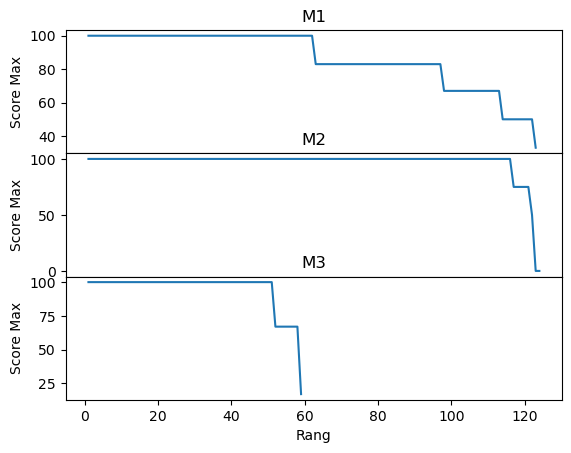

In [30]:
top3_module_Data_Graphique(3)

# Pour tout les top module:


In [31]:
# fig, axs= plt.subplots(figsize=(5,2.7), layout = "constrained")
def nuage_Graphique_All_Module(n_module):
    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
    for i in range(n_module):
        df = moduleData(i).sort_values(by="Score", ascending=False)
        df.insert(0, 'Rang', range(1, 1 + len(df)))
        ax.scatter(df["Rang"], df["temps Total"]/60, label=i)
        ax.set_xlabel('Rang') 
        ax.set_ylabel('Temps Total en Mn')  
        ax.set_title("Nuage pour "+str(i+1)+" top modules")
    ax.legend()
    return df

,Rang,n_session,temps Total,Score,Resultat Final
actor,,,,,
ga2018_gktl@yopmail.com,1,1,353.0,100.0,1
ga2018_oqzx@yopmail.com,2,3,213.0,100.0,1
ga2018_ntbi@yopmail.com,3,4,337.0,100.0,1
ga2018_nov3@yopmail.com,4,4,348.0,100.0,1
ga2018_lprm@yopmail.com,5,6,681.0,100.0,1
...,...,...,...,...,...
dtic@mobiletic.com,118,9,3160.0,50.0,1
ga2018_xand@yopmail.com,119,3,596.0,33.0,0
ga2018_jxvk@yopmail.com,120,2,150.0,33.0,0


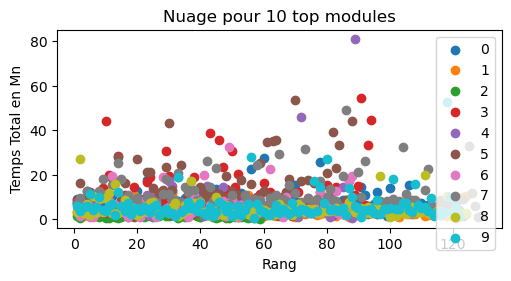

In [32]:
nuage_Graphique_All_Module(10)

In [33]:
# dd = moduleData(1)
# dd.insert(0, 'clase',1)
# dd["clase"]= (np.where(dd["Score"]>=80), "Classe A", np.where(dd["Score"]>=60 , "Classe B", "hhh"))
# # np.where(dd["Score"]>=50 & dd["Score"]<60, "Classe C", "Classe D")

In [34]:
def camembert_Graphiqu(index):
    df = moduleData(index)
    df.insert(0, 'classe',1)
    df["classe"] = df.Score.map(lambda ligne : "Classe A" if (ligne >=80 ) else 
    ("Classe B" if (ligne>=60) else("classe C" if (ligne>=50 ) else "Classe D")))
    df.sort_values("Score")
    categorie = df.groupby("classe").classe.count()
    plt.figure(figsize=(5, 2.7), layout='constrained')
    plt.pie(categorie.values, labels=categorie.index.values , autopct="%1.2f%%")

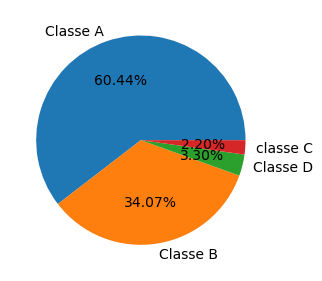

In [35]:
camembert_Graphiqu(10)

In [ ]:
class TpAll:
    
    def moduleData(index):
        nom_module = all_modules.iloc[[index]].index[0]
        all_data_for_module = data.loc[data["object_id"]==nom_module,:].groupby("actor")
        n_session = all_data_for_module.session_uuid.count()
        n_total_temps = all_data_for_module.temps.sum()
        score = all_data_for_module.score.max()
        need_data_module = pd.DataFrame({"n_session":n_session, "temps Total" : n_total_temps, "Score":score})
        need_data_module["Resultat Final"]=np.where(need_data_module["Score"]>=50, 1,0)
        return need_data_module


    def graphique(moduleD):
        moduleD.sort_values(by="temps Total", ascending = False)
        moduleD["temps Total"] = moduleD["temps Total"]/60
        fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
        ax.plot(moduleD["temps Total"], moduleD["Score"], label='Nom')
        ax.set_xlabel('Temps Total') 
        ax.set_ylabel('Score')  
        ax.set_title("Repartition du Score en fonction du Temps")


    def all_Graphique_In_One(all_top_modulex):
        fig, ax = plt.subplots(figsize=(15, 5.7), layout='constrained')
        for i in range(len(all_top_modulex)):
            all_top_modulex[i].sort_values(by="temps Total", inplace=True)
            all_top_modulex[i]["temps Total"] = all_top_modulex[i]["temps Total"]/60
            ax.plot(all_top_modulex[i]["temps Total"], all_top_modulex[i]["Score"], label=i)
        ax.set_xlabel('Temps Total')
        ax.set_ylabel('Score')
        ax.set_title("Repartition du Score en fonction du Temps")
        ax.legend()


    def top3_module_Data_Graphique(n_module):   
        fig, ax = plt.subplots(3,1, layout='constrained', sharex=True)
        fig.subplots_adjust(hspace=0)
        for i in range(n_module):
            moduleData(i).sort_values(by="n_session", ascending=False)
            df = moduleData(i).sort_values(by="Score", ascending=False)
            df.insert(0, 'Rang', range(1, 1 + len(df)))
            ax[i].plot(df["Rang"], df["Score"], label='Nom')
            ax[i].set_xlabel('Rang') 
            ax[i].set_ylabel('Score Max')  
            ax[i].set_title("M"+str(i+1))
        # return df


    def nuage_Graphique_All_Module(n_module):
        fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
        for i in range(n_module):
            df = moduleData(i).sort_values(by="Score", ascending=False)
            df.insert(0, 'Rang', range(1, 1 + len(df)))
            ax.scatter(df["Rang"], df["temps Total"]/60, label=i)
            ax.set_xlabel('Rang') 
            ax.set_ylabel('Temps Total en Mn')  
            ax.set_title("Nuage pour "+str(i+1)+" top modules")
        ax.legend()
        return df


    def camembert_Graphiqu(index):
        df = moduleData(index)
        df.insert(0, 'classe',1)
        df["classe"] = df.Score.map(lambda ligne : "Classe A" if (ligne >=80 ) else 
        ("Classe B" if (ligne>=60) else("classe C" if (ligne>=50 ) else "Classe D")))
        df.sort_values("Score")
        categorie = df.groupby("classe").classe.count()
        plt.figure(figsize=(5, 2.7), layout='constrained')
        plt.pie(categorie.values, labels=categorie.index.values , autopct="%1.2f%%")